# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


We are going to change the index, we will use `Unnamed: 0` as the index

In [9]:
ds.set_index(keys = ds['Unnamed: 0']).drop(['Unnamed: 0'], axis = 1, inplace = True)
ds


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [10]:
new_ds = ds.sort_values(by = ['price'], ascending = False)

expensive_house = new_ds.head(1)

print(f"The house with address {expensive_house['address'].values[0]} is the most expensive and its price is {expensive_house['price'].values[0]} USD")

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [11]:
new_ds = ds.loc[ds['price'] != 0].sort_values(by = ['price'])
# new_ds

cheap_house = new_ds.head(1)
# cheap_house

print(f"The house with address {cheap_house['address'].values[0]} is the cheapest and its price is {cheap_house.price.values[0]} USD")

The house with address Berlin, Coslada is the cheapest and its price is 600 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [12]:
new_ds = ds.dropna(subset = ['surface']).sort_values(by = ['surface'])
new_ds

smallets_house = new_ds.head(1)
biggest_house = new_ds.tail(1)

print(f"The biggest house is located on {biggest_house['address'].values[0]} and its surface is {biggest_house['surface'].values[0]} meters")
print(f"The smallest house is located on {smallets_house['address'].values[0]} and its surface is {smallets_house['surface'].values[0]} meters")

The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [14]:
population_level5 = ds.level5.to_list()
# print(", ".join(population_level5))

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [15]:
# By columns
# This code check if there are at least one NAn value in the columns
# condition_by_columns = ds.isna().any(axis = 0)
condition_by_columns = ds.isna().any(axis = 0)

# By rows
# This does it the same but by row
condition_by_row = ds.isna().any(axis = 1)

ds.isna()


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [16]:
# Original Frame
print((ds.shape))

# Deleting NAs of the dataset
filter_ds = ds.dropna(axis = 'columns')
print(filter_ds.shape)

(15335, 37)
(15335, 25)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [17]:
population_level5 = ds.loc[(ds['level5'] == 'Arroyomolinos (Madrid)') & (ds['price'] != 0)].sort_values(by = ['price'])
population_level5_mean = population_level5['price'].mean()
print(f"Mean of prices in Arroyosmolinos is {np.round(population_level5_mean, 2)}")

Mean of prices in Arroyosmolinos is 298905.18


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

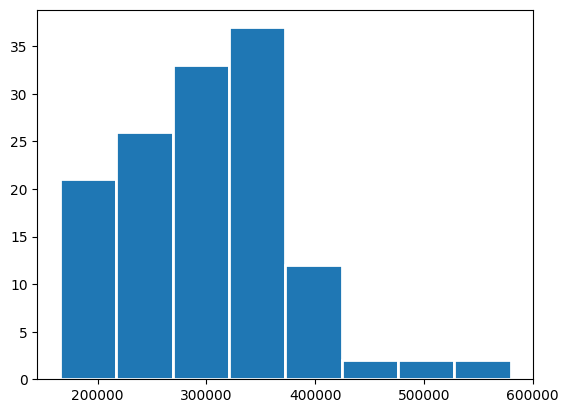

In [18]:
population_level5

prices_of_population_level5 = population_level5.price.values

# histogram
plt.hist(prices_of_population_level5, bins = 8, edgecolor = 'white', linewidth = 2)
plt.show()


#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [19]:
# Valdemorillo average
avg_v = ds.loc[ds.level5 == 'Valdemorillo'].price.mean()
avg_v = np.round(avg_v, 2)
print(f"Valdemorillo Average is {avg_v}")

# Galapagar average
avg_g = np.round(ds.loc[ds.level5 == 'Galapagar'].price.mean(), 2)
print(f"Galapagar average is {avg_g}")

Valdemorillo Average is 363860.29
Galapagar average is 360063.2


No, average prices of Valdemorillo is different to Galapagar

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [20]:
valdemorillo = ds.loc[ds.level5 == 'Valdemorillo'].dropna(subset = ['surface', 'price'])
valdemorillo['pps'] = valdemorillo['price'] / valdemorillo['surface']

# Now, we calculate the average to the column `pps`
aveg_pps_v = np.round(valdemorillo.pps.mean(), 2)
print(f"Average of price per square meter in Valdemorillo is: {aveg_pps_v}")

galapagar = ds.loc[ds.level5 == 'Galapagar'].dropna(subset = ['surface'])
galapagar['pps'] = galapagar.price / galapagar.surface
aveg_pps_g = np.round(galapagar.pps.mean(), 2)
print(f"Average of price per square meter in Galapagar is: {aveg_pps_g}")

Average of price per square meter in Valdemorillo is: 1317.95
Average of price per square meter in Galapagar is: 1606.32


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

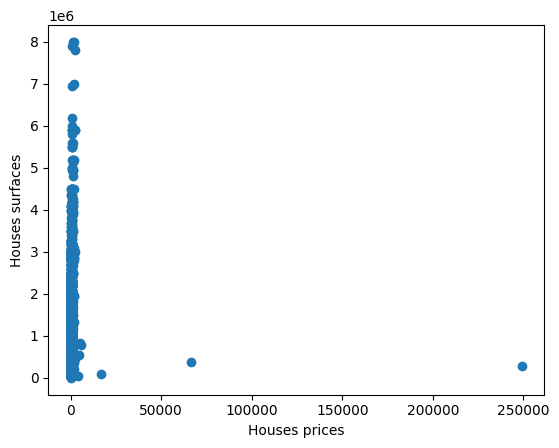

In [21]:
clean_ds = ds.loc[ds.price != 0].dropna(subset=['surface'])

surface_houses = clean_ds.surface.values
price_houses = clean_ds.price.values

# Scatter plot

plt.scatter(surface_houses, price_houses)
plt.ylabel('Houses surfaces')
plt.xlabel('Houses prices')
plt.show()

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [22]:
print(f"Dataset containt {ds.realEstate_name.value_counts().count()} real estate agencies")

Dataset containt 1821 real estate agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [23]:
test = ds['level5'].value_counts().head(1)
print(f"The population in level5 column that contains the most house is{test.index[0]} that have {test.values[0]} houses")

The population in level5 column that contains the most house is Madrid Capital that have 6643 houses


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [90]:
# filter by estates
expected_estates = ['Leganés', 'Getafe', 'Fuenlabrada', 'Alcorcón']

# new dataset
south_belt = ds.loc[ds.level5.isin(expected_estates)]


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

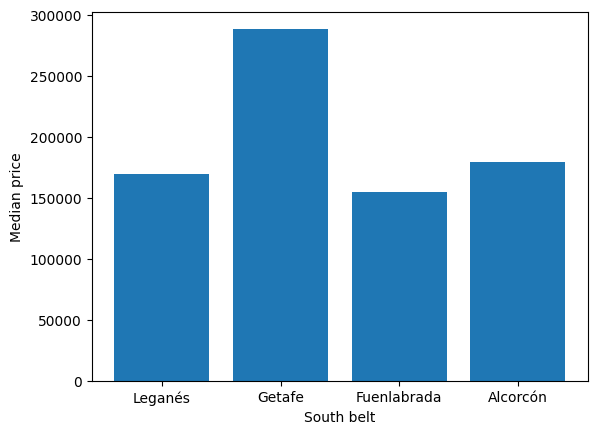

In [91]:
south_belt_filter = south_belt.loc[south_belt.price != 0]

# Leganes
leganes = south_belt_filter[south_belt_filter.level5 == 'Leganés']
leganes_median = leganes.price.median()
# print(leganes_median)

# Getafe
getafe = south_belt_filter[south_belt_filter.level5 == 'Getafe']
getafe_median = getafe.price.median()
# print(getafe_median)

# Fuenlabrada
fuenlabrada = south_belt_filter[south_belt_filter.level5 == 'Fuenlabrada']
fuenla_median = fuenlabrada.price.median()
# print(fuenla_median)

# Alcorcon
alcorcon = south_belt_filter[south_belt_filter.level5 == 'Alcorcón']
alcorcon_median = alcorcon.price.median()
# print(alcorcon_median)

# bar plot
valores = [leganes_median, getafe_median, fuenla_median, alcorcon_median]

plt.bar(expected_estates, valores)
plt.xlabel('South belt')
plt.ylabel('Median price')
plt.show()



#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [115]:
# TODO: Calculate mean and variance of : price, rooms, surface and bathroomm

# Clean up data
south_belt_clean = south_belt[(south_belt.price != 0) & (south_belt.surface != 0) & (south_belt.bathrooms != 0) & (south_belt.rooms != 0)].dropna(subset = ['rooms', 'bathrooms', 'surface'])
# south_belt_clean

print("Media", "Variance")

# 1 - price
mean_price_sbc = np.round(south_belt_clean.price.mean(), 2)
var_price_sbc = np.round(south_belt_clean.price.var())
print(mean_price_sbc, var_price_sbc)

# 2 - rooms
mean_rooms_sbc = np.round(south_belt_clean.rooms.mean(), 2)
var_rooms_sbc = np.round(south_belt_clean.rooms.var(), 2)
print(mean_rooms_sbc, var_rooms_sbc)

# 3 - surface
mean_surface_sbc = np.round(south_belt_clean.surface.mean(), 2)
var_surface_sbc = np.round(south_belt_clean.surface.var(), 2)
print(mean_surface_sbc, var_surface_sbc)

# 4 - bathrooms
mean_bathrooms_sbc = np.round(south_belt_clean.bathrooms.mean(), 2)
var_bathrooms_sbc = np.round(south_belt_clean.bathrooms.var(), 2)
print(mean_bathrooms_sbc, var_bathrooms_sbc)


Media Variance
225993.2 14709922587.0
3.01 0.71
111.45 4306.57
1.63 0.58


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [ ]:
# TODO

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [ ]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [ ]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
